In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 500

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

# Кластеризация

Наша задача - предсказать есть диабет у индивида или нет. В качестве таргета - колонка Diabetes. В нем три различных значения: `0`, `1`, `2`. `0` означает, что наблюдаемой здоров, `1` значит, что есть риск диабета, `2` означает наличие диабета. В качестве признаков будем использовать пол, количество лет в США, доход семьи и некоторые показатели, измеренные медицинскими работниками.  

**Задание 1.** В этой части ДЗ попробуем использовать кластеризацию как инструмент при проведении моделирования в задаче классификации

In [2]:
df = pd.read_csv('datahw21.csv', index_col='Unnamed: 0')

df.head()

,Gender,Years_in_US,Family_income,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed,Diabetes
0,1,0.0,0.84,35.3,20.6,55.2,2.0,2.0
1,1,0.0,1.78,34.7,24.4,61.5,2.0,2.0
2,1,0.0,4.51,33.5,25.6,91.0,2.0,2.0
3,1,0.0,2.52,21.0,14.9,32.2,2.0,0.0
4,2,0.0,5.00,25.2,20.7,30.9,2.0,0.0


<Axes: >

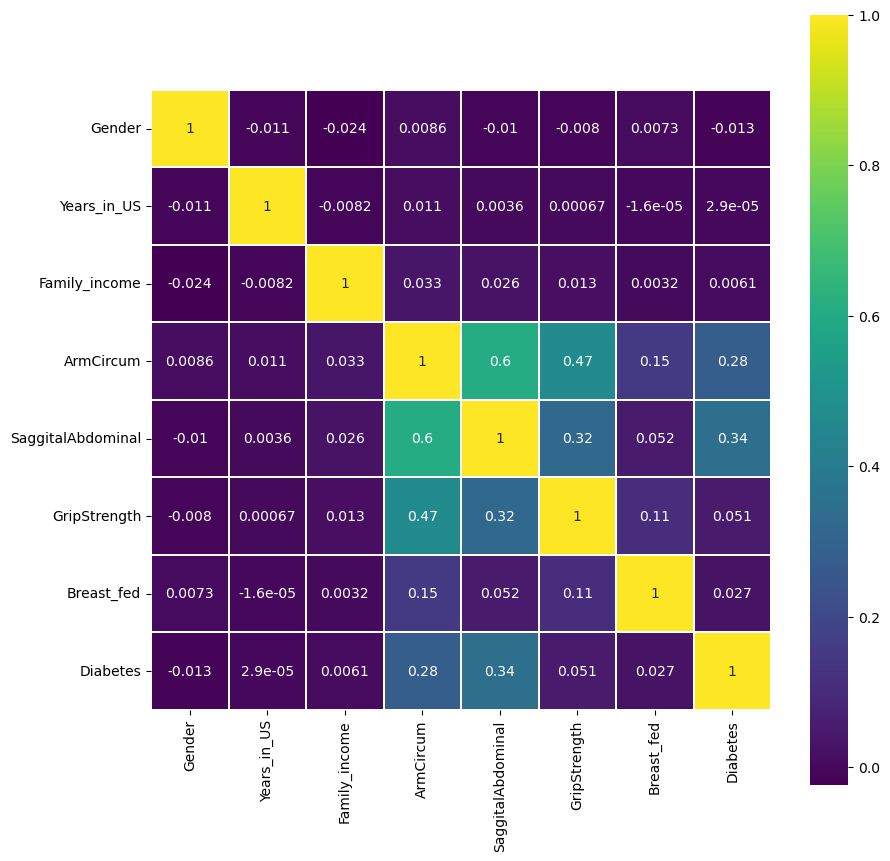

In [3]:
### Посмотрим как устроены данные
### Изобразим корреляционную матрицу

colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

In [4]:
### Разделим выборку на трейн-тест

data = df.drop(['Diabetes'], axis=1)
target = df[['Diabetes']]

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    target, 
                                                    test_size=0.25,
                                                    random_state=1)

Для того, чтобы использовать K-means, лучше будет отнормировать данные. 

In [5]:
### Воспользуемся StandardScaler

### Your code is here


In [6]:
# Отнормируем X_train и X_test и запишем в отдельные переменные X_train_scaled и X_test_scaled

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_train_scaled.head()

,Gender,Years_in_US,Family_income,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed
0,-1.017409,-0.198311,-0.311557,0.380926,-0.823248,0.282705,0.388951
1,0.982889,-0.198311,0.037744,0.057088,-0.306067,-1.259208,0.388951
2,-1.017409,-0.198311,-0.599577,-0.538774,-0.964298,-0.280860,0.388951
3,0.982889,-0.198311,-0.446375,0.419786,-0.705707,-0.226757,0.388951
4,0.982889,-0.198311,1.686197,0.251391,-0.165018,-0.366521,0.388951


In [7]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_test_scaled.head()

,Gender,Years_in_US,Family_income,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed
0,0.982889,-0.198311,1.686197,1.171090,1.621608,-0.068959,0.388951
1,0.982889,-0.198311,-1.249153,0.536368,-0.635182,1.563125,0.388951
2,0.982889,-0.198311,-0.722138,0.924974,1.221968,0.629861,0.388951
3,-1.017409,-0.198311,-0.936621,-0.266750,-0.917281,-0.204215,0.388951
4,-1.017409,-0.198311,1.686197,0.639996,0.093573,1.008577,-2.571018


Обучим K-Means с параметрами `n_clusters` = 3, `tol` = 0.0005. Выбор параметров обусловлен тем, что у нас три возможных значения таргета. Но в целом основной подход подбора количества кластеров - по кривой зависимости внутрикластерного и межкластерного расстояний от количества кластеров.

Установите `random_state` = 1

In [8]:
### Your code is here
model_kmeans = KMeans(n_clusters=3, tol=0.0005, random_state=1)
model_kmeans.fit(X_train_scaled)

KMeans(n_clusters=3, random_state=1, tol=0.0005)

In [9]:
model_kmeans.transform(X_train_scaled)

array([[3.35589276, 1.6481583 , 2.08584806],
       [3.30977021, 1.44897241, 2.63536465],
       [3.28614474, 1.27009526, 2.78765992],
       ...,
       [3.53301156, 2.0334784 , 2.0393568 ],
       [1.6385419 , 3.38872862, 4.14167939],
       [5.06234606, 4.46387618, 3.10198443]])

In [10]:
# для степа 7 формируем df с расстояниями 
X_train_scaled_step_7 = pd.DataFrame(data=model_kmeans.transform(X_train_scaled), columns=['col_one', 'col_two', 'col_three'])
X_test_scaled_step_7 = pd.DataFrame(data=model_kmeans.transform(X_test_scaled), columns=['col_one', 'col_two', 'col_three'])

Посчитаем качество на изначальных данных(нормированных). Для этого обучите с дефолтными параметрами `RandomForestClassifier`, `LogisticRegression`, `LinearSVC`. Там, где нужно, установите `random_state` = 1. (1б)

In [11]:
### Your code is here
model_random_forest = RandomForestClassifier(random_state=1)
model_random_forest.fit(X_train_scaled, y_train)

model_LR = LogisticRegression(random_state=1)
model_LR.fit(X_train_scaled, y_train)

model_lin_svc = LinearSVC(random_state=1)
model_lin_svc.fit(X_train_scaled, y_train)

# Предсказания моделей
y_pred_random_forest = model_random_forest.predict(X_test_scaled)
y_pred_lr = model_LR.predict(X_test_scaled)
y_pred_lin_svc = model_lin_svc.predict(X_test_scaled)

print(f'Accuracy Random Forest {accuracy_score(y_test, y_pred_random_forest):.4f}')
print(f'Accuracy LR {accuracy_score(y_test, y_pred_lr):.4f}')
print(f'Accuracy LinearSVC  {accuracy_score(y_test, y_pred_lin_svc):.4f}')

Accuracy Random Forest 0.8859
Accuracy LR 0.8875
Accuracy LinearSVC  0.8920


In [12]:
# ОТВЕТ СТЕП 5
# 0.886, 0.888, 0.892

Добавьте в признаковое описание номер кластера и посчитайте качество с новым признаком! Стало ли качество хоть сколько-то лучше? (1б)

In [13]:
### Your code is here

In [14]:
model_kmeans.predict(X_train_scaled)

array([1, 1, 1, ..., 1, 0, 2])

In [15]:
# Добавляем номер кластера в X_train_scaled и в X_test_scaled
X_train_scaled['cluster_kmean'] = model_kmeans.predict(X_train_scaled)
X_test_scaled['cluster_kmean'] = model_kmeans.predict(X_test_scaled)

In [16]:
model_random_forest = RandomForestClassifier(random_state=1)
model_random_forest.fit(X_train_scaled, y_train)

model_LR = LogisticRegression(random_state=1)
model_LR.fit(X_train_scaled, y_train)

model_lin_svc = LinearSVC(random_state=1)
model_lin_svc.fit(X_train_scaled, y_train)

y_pred_random_forest = model_random_forest.predict(X_test_scaled)
y_pred_lr = model_LR.predict(X_test_scaled)
y_pred_lin_svc = model_lin_svc.predict(X_test_scaled)

print(f'Accuracy Random Forest {accuracy_score(y_test, y_pred_random_forest):.4f}')
print(f'Accuracy LR {accuracy_score(y_test, y_pred_lr):.4f}')
print(f'Accuracy LinearSVC  {accuracy_score(y_test, y_pred_lin_svc):.4f}')

Accuracy Random Forest 0.8888
Accuracy LR 0.8896
Accuracy LinearSVC  0.8920


In [17]:
# 0.889, 0.890, 0.892

In [18]:
# Не принимает ответ из-за рандома
# Код верный
# ОТВЕТ СТЕП 6
# 0.888, 0.888, 0.892

Посчитаем расстояния от объектов до центров кластеров. Для этого воспользуемся методом `transform` обученного класса kmeans.

Обучим и посчитаем метрики исключительно на расстояниях до центра. Убедимся, что такой подход имеет право на существование, если данные позволяют, то качество не сильно должно пострадать. А в каких-то случаях может оказаться даже лучше! Таким образом можно снижать размерность данных. (2б)

In [19]:
### Your code is here


In [20]:
X_train_scaled_step_7.head(2)

,col_one,col_two,col_three
0,3.355893,1.648158,2.085848
1,3.309770,1.448972,2.635365


In [21]:
X_test_scaled_step_7.head(2)

,col_one,col_two,col_three
0,4.291918,3.443839,2.264262
1,3.982087,2.811409,2.353323


In [22]:
# обучим модели и посчитаем метрики на расстояниях до центров
# X_train_scaled_step_7 и X_test_scaled_step_7

model_random_forest = RandomForestClassifier(random_state=1)
model_random_forest.fit(X_train_scaled_step_7, y_train)

model_LR = LogisticRegression(random_state=1)
model_LR.fit(X_train_scaled_step_7, y_train)

model_lin_svc = LinearSVC(random_state=1)
model_lin_svc.fit(X_train_scaled_step_7, y_train)

y_pred_random_forest = model_random_forest.predict(X_test_scaled_step_7)
y_pred_lr = model_LR.predict(X_test_scaled_step_7)
y_pred_lin_svc = model_lin_svc.predict(X_test_scaled_step_7)

print(f'Accuracy Random Forest {accuracy_score(y_test, y_pred_random_forest):.4f}')
print(f'Accuracy LR {accuracy_score(y_test, y_pred_lr):.4f}')
print(f'Accuracy LinearSVC  {accuracy_score(y_test, y_pred_lin_svc):.4f}')

Accuracy Random Forest 0.8835
Accuracy LR 0.8920
Accuracy LinearSVC  0.8920


In [23]:
# 0.884, 0.892, 0.892